In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import plotly.express as px
import plotly.graph_objects as go


In [260]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [261]:
df.rename(columns={'Country/Region' :'Country'},inplace=True)
#df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']

In [262]:
top=df[df['Date'] ==df['Date'].max()]
world=top.groupby('Country')['Confirmed','Active','Deaths'].sum().reset_index()
top.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [263]:
figure= px.choropleth(world,locations='Country',
                      locationmode='country names',color='Active',hover_name='Country',
                      range_color=[1,1000],color_continuous_scale='Peach',title='countries with active cases')
figure.show()

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

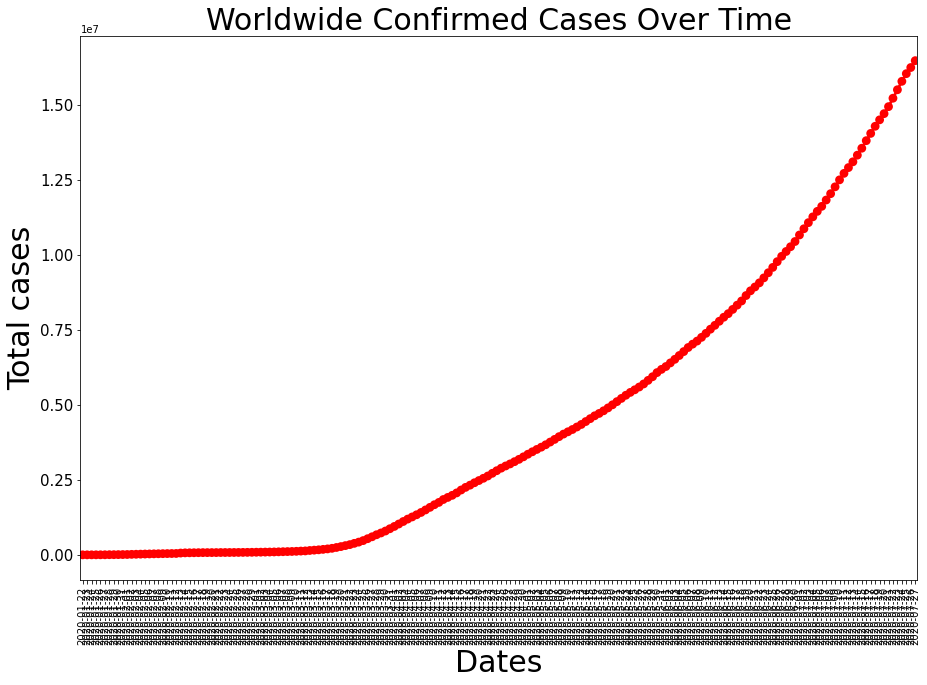

In [264]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide Confirmed Cases Over Time',fontsize=30)
total_cases=df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases['Date']=pd.to_datetime(total_cases['Date'])
ax=sns.pointplot(x=total_cases.Date.dt.date,y=total_cases.Confirmed,color='r')
ax.set(xlabel='Dates',ylabel='Total cases')

In [275]:

tot_cases=df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).to_frame()
tot_cases.style.background_gradient(cmap='Blues_r')

,Active
Country,
US,156981121
Brazil,31094060
United Kingdom,22624595
Russia,19668578
India,15987913
France,10980287
Spain,9277432
Canada,8656985
Peru,7748957


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

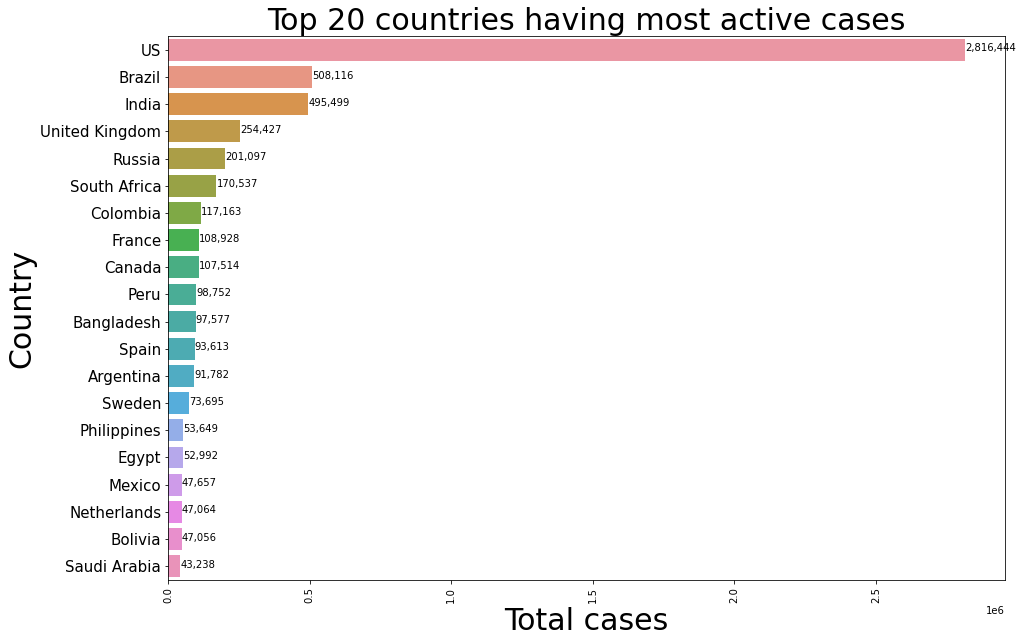

In [265]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('Countries',fontsize=30)
plt.title('Top 20 countries having most active cases',fontsize=30)
top_actives= top.groupby(by='Country')['Active'].sum().sort_values(ascending=False).head(20).reset_index()
ax=sns.barplot(x=top_actives.Active,y=top_actives.Country)
for i , (value,name) in enumerate (zip(top_actives.Active,top_actives.Country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10, ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')    

In [288]:
Germany=df[df.Country=='Germany']
Germany = Germany.groupby(by='Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
Germany=Germany.iloc[60:].reset_index().drop('index',axis=1)
fig=go.Figure()
fig.add_trace(go.Scatter(x=Germany['Date'],y=Germany['Confirmed'],mode='lines+markers',name='Confirmed'))
fig.add_trace(go.Scatter(x=Germany['Date'],y=Germany['Deaths'],mode='lines+markers',name='Deaths'))
fig.add_trace(go.Scatter(x=Germany['Date'],y=Germany['Recovered'],mode='lines+markers',name='Recovered'))
fig.update_layout(title='Germany : COVID-19 Cases',xaxis_tickfont_size=14,yaxis=dict(title='Number of cases'))
fig.show()

In [289]:
Tunisia=df[df.Country=='Tunisia']
Tunisia = Tunisia.groupby(by='Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
Tunisia=Tunisia.iloc[60:].reset_index().drop('index',axis=1)
fig=go.Figure()
fig.add_trace(go.Scatter(x=Tunisia['Date'],y=Tunisia['Confirmed'],mode='lines+markers',name='Confirmed'))
fig.add_trace(go.Scatter(x=Tunisia['Date'],y=Tunisia['Deaths'],mode='lines+markers',name='Deaths'))

fig.add_trace(go.Scatter(x=Tunisia['Date'],y=Tunisia['Recovered'],mode='lines+markers',name='Recovered'))
fig.update_layout(title='Tunisia : COVID-19 Cases',xaxis_tickfont_size=14,yaxis=dict(title='Number of cases'))
fig.show()